#  Instability Analysis sfho135 2.5 ms:

Loading DD21352p5_enu_density_on_tau_enu_surf_q1.dat
Loading DD21352p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD22p5.dat
Oi_max of DD22p5: 0.01947961
mu_max of DD22p5: 72.13354
Loading DD21355_enu_density_on_tau_enu_surf_q1.dat
Loading DD21355_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD25.dat
Oi_max of DD25: 0.01629178
mu_max of DD25: 71.56571
Loading DD21357p5_enu_density_on_tau_enu_surf_q1.dat
Loading DD21357p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD27p5.dat
Oi_max of DD27p5: 0.01766855
mu_max of DD27p5: 85.90307
Loading DD213510_enu_density_on_tau_enu_surf_q1.dat
Loading DD213510_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD210.dat
Oi_max of DD210: 0.01622179
mu_max of DD210: 86.32092
Loading SFHo1352p5_enu_density_on_tau_enu_surf_q1.dat
Loading SFHo1352p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaISFHo2p5.dat
Oi_max of SFHo2p5: 0.02527998
mu_max of SFHo2p5: 67.73062
Loading SFHo1355_enu_density_on_tau_enu_surf_q1.dat
Loading SFHo1

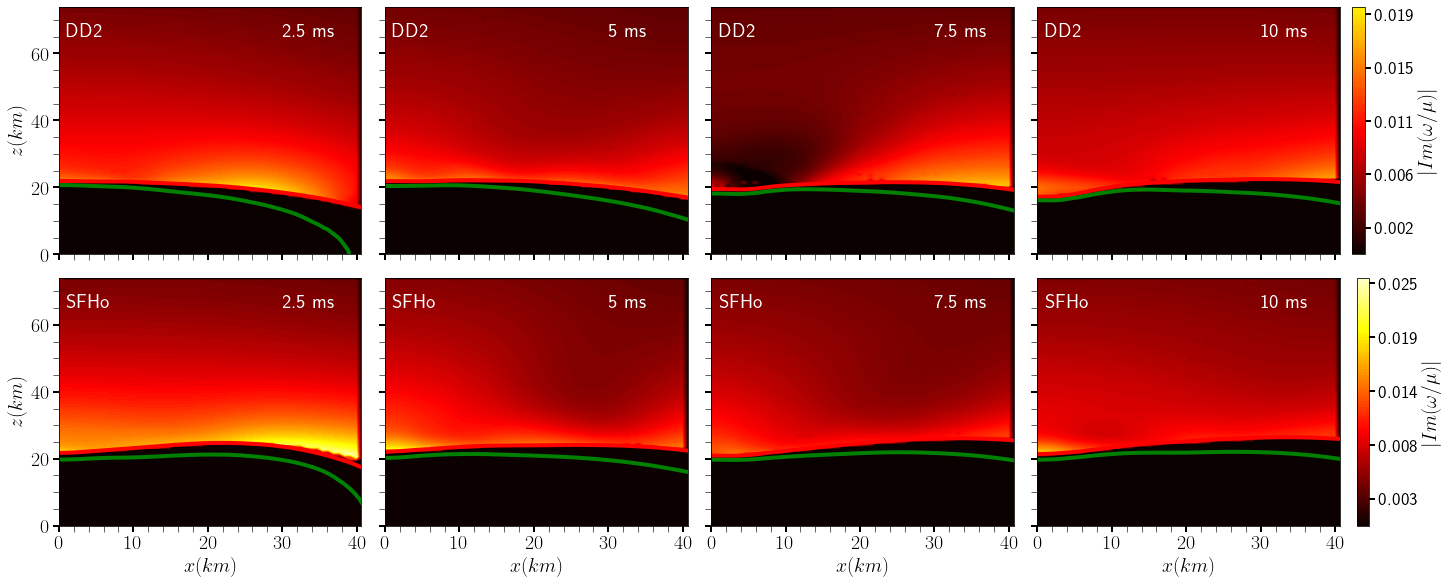

Done!.

Loading DD21352p5_enu_density_on_tau_enu_surf_q1.dat
Loading DD21352p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD22p5.dat
Oi_max of DD22p5: 0.01947961
mu_max of DD22p5: 72.13354
Loading DD21355_enu_density_on_tau_enu_surf_q1.dat
Loading DD21355_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD25.dat
Oi_max of DD25: 0.01629178
mu_max of DD25: 71.56571
Loading DD21357p5_enu_density_on_tau_enu_surf_q1.dat
Loading DD21357p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD27p5.dat
Oi_max of DD27p5: 0.01766855
mu_max of DD27p5: 85.90307
Loading DD213510_enu_density_on_tau_enu_surf_q1.dat
Loading DD213510_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaIDD210.dat
Oi_max of DD210: 0.01622179
mu_max of DD210: 86.32092
Loading SFHo1352p5_enu_density_on_tau_enu_surf_q1.dat
Loading SFHo1352p5_aenu_density_on_tau_aenu_surf_q1.dat
Loading OmegaISFHo2p5.dat
Oi_max of SFHo2p5: 0.02527998
mu_max of SFHo2p5: 67.73062
Loading SFHo1355_enu_density_on_tau_enu_surf_q1.dat
Loadi

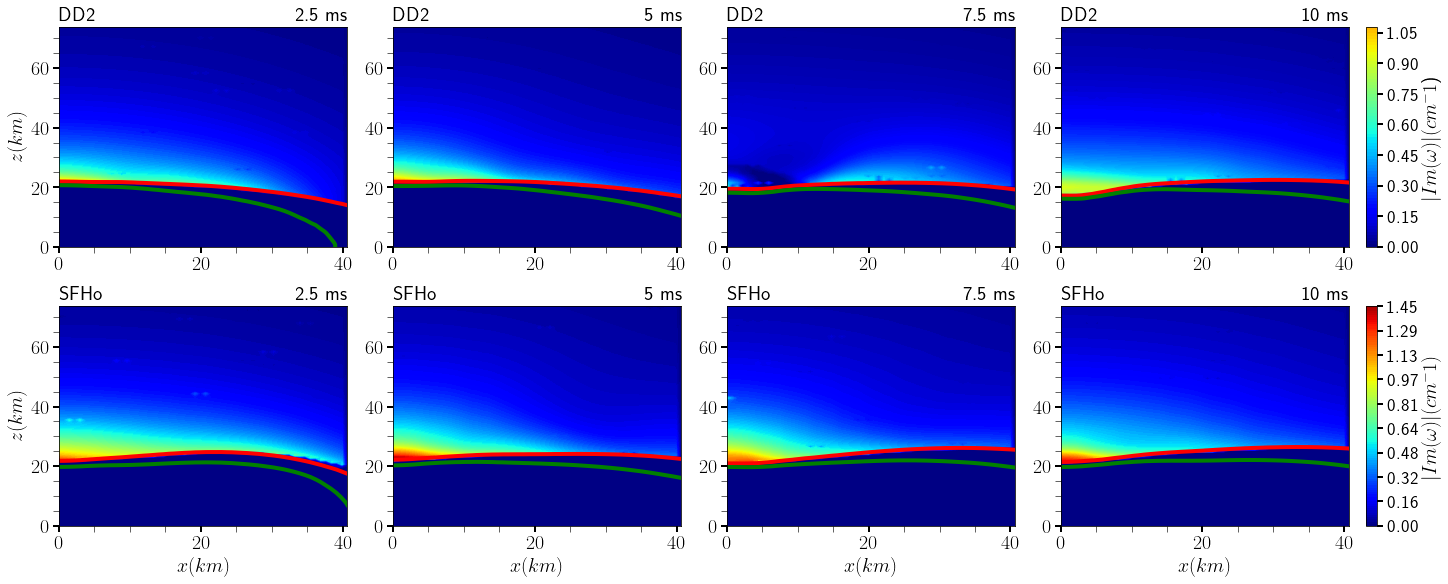

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
plt.rc('text', usetex=True)

#plt.style.use('seaborn-white')
#plt.rcParams['savefig.facecolor'] = "0.9"
def clean(data):
    for i in range(2,len(data)-2):
        if (data[i]<data[i+1]) and (data[i-1]>data[i]):
            if (data[i+2]!=0.0) and (data[i-2]!=0.):
                data[i] = (data[i]+np.sqrt(data[i-1] * data[i+1]))/2.0
    return(data)
        
    
    
x = np.linspace(0, 55, 56)
y = np.linspace(0, 100, 101)
Y, X = np.meshgrid(y, x)


EoS = ["DD2", "SFHo"]
T = ["2p5", "5", "7p5", "10"]
t = ["2.5 ms", "5 ms", "7.5 ms", "10 ms"]


Surfnu = [[56, 56, 59, 63],[60,59,63,63]]
Surfanu = [[63, 56, 58,61],[64,58,59,59]]




norm = matplotlib.colors.Normalize(0.,0.027)
colorsO = [[norm(0.),"black"],[norm(0.01), "blue"],
          [norm(0.015),"cyan"], [norm(0.020),"yellow"], [norm(0.027),"red"]]
colormapO = matplotlib.colors.LinearSegmentedColormap.from_list("", colorsO)
colormapO = "hot"

norm = matplotlib.colors.Normalize(0.,95)
colorsmu = [[norm(0.),"black"],[norm(0.1), "darkblue"],[norm(35), "cyan"],
          [norm(75),"red"], [norm(95),"yellow"]]
colormapmu = matplotlib.colors.LinearSegmentedColormap.from_list("", colorsmu)

norm = matplotlib.colors.Normalize(0.,1.5)
colorsOmu = [[norm(0.),"black"],[norm(0.3), "blue"],[norm(0.75), "cyan"],[norm(1.), "yellow"],
            [norm(1.5),"red"]]
colormapOmu = matplotlib.colors.LinearSegmentedColormap.from_list("", colorsOmu)
colormapOmu = "jet"

lsnu = '-r'
lsanu = '-g'

cmap = 'hot'
fntsize  =20
cbticklen = 6
lblsize  = 20
figxsize = 20
figzsize = 8
ncontour  = 100
ls = '-'
lw = 4
cbaspect = 50
levs = np.arange(0., 0.02, 0.0001)

fig, axs  = plt.subplots(2,4, figsize=(figxsize, figzsize),constrained_layout=True,)
for i in range(len(EoS)):
    cfO = []
    cfOmu = []
    for j in range(len(T)):
        Nx1 = Surfnu[i][j]
        Nx2 = Surfanu[i][j]
        Nz1 = Nx1
        Nz2 = Nx2

        outname = "InstabCmap" + EoS[i]+T[j]+".png"
        print("Loading " + EoS[i]+'135'+T[j]+'_enu_density_on_tau_enu_surf_q1.dat')
        surfx1_, surfz1_, data1_ = np.loadtxt(EoS[i]+'135'+T[j]+'_enu_density_on_tau_enu_surf_q1.dat', unpack='True')
        print("Loading " + EoS[i]+'135'+T[j]+'_aenu_density_on_tau_aenu_surf_q1.dat')
        surfx2_, surfz2_, data2_ = np.loadtxt(EoS[i]+'135'+T[j]+'_aenu_density_on_tau_aenu_surf_q1.dat', unpack='True')
        print("Loading " + 'OmegaI'+EoS[i] + T[j]+'.dat')
        xx, zz, _Oi, _mu = np.loadtxt('OmegaI'+EoS[i] + T[j]+'.dat', unpack='True')

        _mu = clean(_mu)
        _Oi = clean (_Oi)


        np.array(_Oi)
        np.array(_mu)

        Oi_ = _Oi[:56*101]
        Oi = Oi_.reshape(56, 101)
        print("Oi_max of " + EoS[i] + T[j] + ":", Oi.max())

        mu_ = _mu[:56*101]
        mu = mu_.reshape(56, 101)

        print("mu_max of " + EoS[i] + T[j] + ":", mu.max())

        surfx1 = surfx1_[0:Nx1]
        surfz1 = surfz1_[0:Nz1]

        surfx2 = surfx2_[0:Nx2]
        surfz2 = surfz2_[0:Nz2]

        #fig = plt.figure(figsize=(5, 5),constrained_layout=True)
    ###############################  Im[\omega]  #####################################
    
        ax = axs[i][j]
        ax.tick_params(labelsize = lblsize, direction='out', length=cbticklen, width=lw)
        cf=ax.contourf(X*0.739, (100-Y)*0.739, Oi,ncontour, cmap=colormapO, vmin = 0.0, vmax =0.027)
        cfO.append(cf)
        ax.plot((surfx1-145)*0.739, (surfz1-145)* 0.739, lsnu, linewidth = lw, label='$\\nu_e$')
        ax.plot((surfx2-145)*0.739, (surfz2-145) *0.739, lsanu, linewidth = lw, label='$\\bar\\nu_e$')
        
        if (i==1):
            ax.set_xlabel('$x (km)$', fontsize=fntsize)
        else:
            ax.set_xticklabels("")
        #ax.set_title(t[j], loc = 'right', fontsize = fntsize)
        #ax.set_title(EoS[i], loc = 'left', fontsize = fntsize)
        ax.text(1.0, 65.0,EoS[i], fontsize=fntsize, color = "white")
        ax.text(30.0, 65.0,t[j], fontsize=fntsize, color = "white")
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        ax.tick_params(which='minor', length=cbticklen, direction = 'out')
        ax.tick_params(which='major', length=cbticklen, direction = 'out')
        ax.tick_params(labelsize = lblsize, direction='out', length=cbticklen, width=lw/2)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        #ax.legend(loc = 0, frameon='True')

        if (j==0):
            ax.set_ylabel('$z (km)$', fontsize=fntsize)
        else:
            ax.set_yticklabels("")
        if (i==0):
            if (j==3):
                #v1 = np.linspace(Oi.min(), Oi.max(), 5, endpoint=True)
                cb = fig.add_axes()
                tik = np.linspace(0.0, 0.019, 10, endpoint = True)
                cbar = fig.colorbar(cfO[0],ax= ax,
                            aspect = cbaspect,         
                            ticks = tik[::-2],
                            format = "%0.3f",
                                       )
                cbar.ax.tick_params(tickdir='out',size= cbticklen, width =2, labelsize=fntsize/1.1)
                cbar.ax.set_ylabel('$|Im(\\omega/\\mu)|$', 
                        fontsize =fntsize)
        if (i==1):
            if (j==3):
                #v1 = np.linspace(Oi.min(), Oi.max(), 5, endpoint=True)
                cb = fig.add_axes()
                tik = tik = np.linspace(0.0, 0.025, 10, endpoint = True)
                cbar = fig.colorbar(cfO[0],ax= ax,
                            aspect = cbaspect,         
                            #shrink=1.0,
                            ticks = tik[::-2],
                            format = "%0.3f",
                                       )
                cbar.ax.tick_params(tickdir='out',size= cbticklen, width =2, labelsize=fntsize/1.1)
                cbar.ax.set_ylabel('$|Im(\\omega/\\mu)|$', 
                        fontsize =fntsize)
plt.savefig('Cmap' + 'OIbymu.png', dpi=300, axis='tight')
plt.show()
print("Done!.\n")

###############################################################################################################

fig, axs  = plt.subplots(2,4, figsize=(figxsize, figzsize),constrained_layout=True,)
for i in range(len(EoS)):
    cfO = []
    cfOmu = []
    for j in range(len(T)):
        Nx1 = Surfnu[i][j]
        Nx2 = Surfanu[i][j]
        Nz1 = Nx1
        Nz2 = Nx2

        outname = "InstabCmap" + EoS[i]+T[j]+".png"
        print("Loading " + EoS[i]+'135'+T[j]+'_enu_density_on_tau_enu_surf_q1.dat')
        surfx1_, surfz1_, data1_ = np.loadtxt(EoS[i]+'135'+T[j]+'_enu_density_on_tau_enu_surf_q1.dat', unpack='True')
        print("Loading " + EoS[i]+'135'+T[j]+'_aenu_density_on_tau_aenu_surf_q1.dat')
        surfx2_, surfz2_, data2_ = np.loadtxt(EoS[i]+'135'+T[j]+'_aenu_density_on_tau_aenu_surf_q1.dat', unpack='True')
        print("Loading " + 'OmegaI'+EoS[i] + T[j]+'.dat')
        xx, zz, _Oi, _mu = np.loadtxt('OmegaI'+EoS[i] + T[j]+'.dat', unpack='True')

        _mu = clean(_mu)
        _Oi = clean (_Oi)


        np.array(_Oi)
        np.array(_mu)

        Oi_ = _Oi[:56*101]
        Oi = Oi_.reshape(56, 101)
        print("Oi_max of " + EoS[i] + T[j] + ":", Oi.max())

        mu_ = _mu[:56*101]
        mu = mu_.reshape(56, 101)

        print("mu_max of " + EoS[i] + T[j] + ":", mu.max())

        surfx1 = surfx1_[0:Nx1]
        surfz1 = surfz1_[0:Nz1]

        surfx2 = surfx2_[0:Nx2]
        surfz2 = surfz2_[0:Nz2]

##############################   \omega\times\mu  #######################################
        ax = axs[i][j]
        norm = matplotlib.colors.Normalize(0.,1.5)
        colors = [[norm(0.),"black"],[norm(0.1), "blue"],[norm(1.0), "red"],[norm(1.5),"yellow"]]
        colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
        evs = np.arange(0., 1.501, 0.005)

        cf=ax.contourf(X*0.739, (100-Y)*0.739, Oi*mu, ncontour, cmap=colormapOmu, vmin = 0.0, vmax = 1.5)
        cfOmu.append(cf)
        ax.plot((surfx1-145)*0.739, (surfz1-145)* 0.739, lsnu, linewidth = lw, label='$\\nu_e$')
        ax.plot((surfx2-145)*0.739, (surfz2-145) *0.739, lsanu, linewidth = lw, label='$\\bar\\nu_e$')
        if (i==1):
            ax.set_xlabel('$x (km)$', fontsize=fntsize)
        ax.set_title(t[j], loc = 'right', fontsize = fntsize)
        ax.set_title(EoS[i], loc = 'left', fontsize = fntsize)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.tick_params(labelsize = lblsize, direction='in', length=cbticklen, width=lw/2)
        ax.tick_params(which='minor', length=6, direction = 'out')
        ax.tick_params(which='major', length=6, direction = 'out')
        
        #ax.legend(loc = 0, frameon='True')

        if (j==0):
            ax.set_ylabel('$z (km)$', fontsize=fntsize)
        if (i==0):
            if (j==3):
                tik = np.linspace(0.0, 1.35, 10, endpoint=True)
                cb = fig.add_axes()
                cbar = fig.colorbar(cfOmu[0],ax= ax,
                        ticks = tik[::-1], 
                        aspect = cbaspect,         
                        #shrink=1.0,
                        format = "%0.2f"
                               )
                cbar.ax.tick_params(tickdir='out',size= cbticklen, width =2, labelsize=fntsize/1.1)
                cbar.ax.set_ylabel('$|Im(\\omega)| (cm^-1$)', fontsize =fntsize)
        if (i==1):
            if (j==3):
                tik = np.linspace(0.0, 1.45, 10, endpoint=True)
                cb = fig.add_axes()
                cbar = fig.colorbar(cfOmu[1],ax= ax,
                        ticks = tik, 
                        aspect = cbaspect,         
                        #shrink=1.0,
                        format = "%0.2f"
                               )
                cbar.ax.tick_params(tickdir='out',size= cbticklen, width =2, labelsize=fntsize/1.1)
                cbar.ax.set_ylabel('$|Im(\\omega)| (cm^-1)$', fontsize =fntsize)
    ########################################################################
        
plt.savefig('Cmap' + 'OI.png', dpi=300, axis='tight')
plt.show()
   

1.09819
1.072427
0.6408397
0.9210987
1.265088
1.447005
1.243308
1.311478


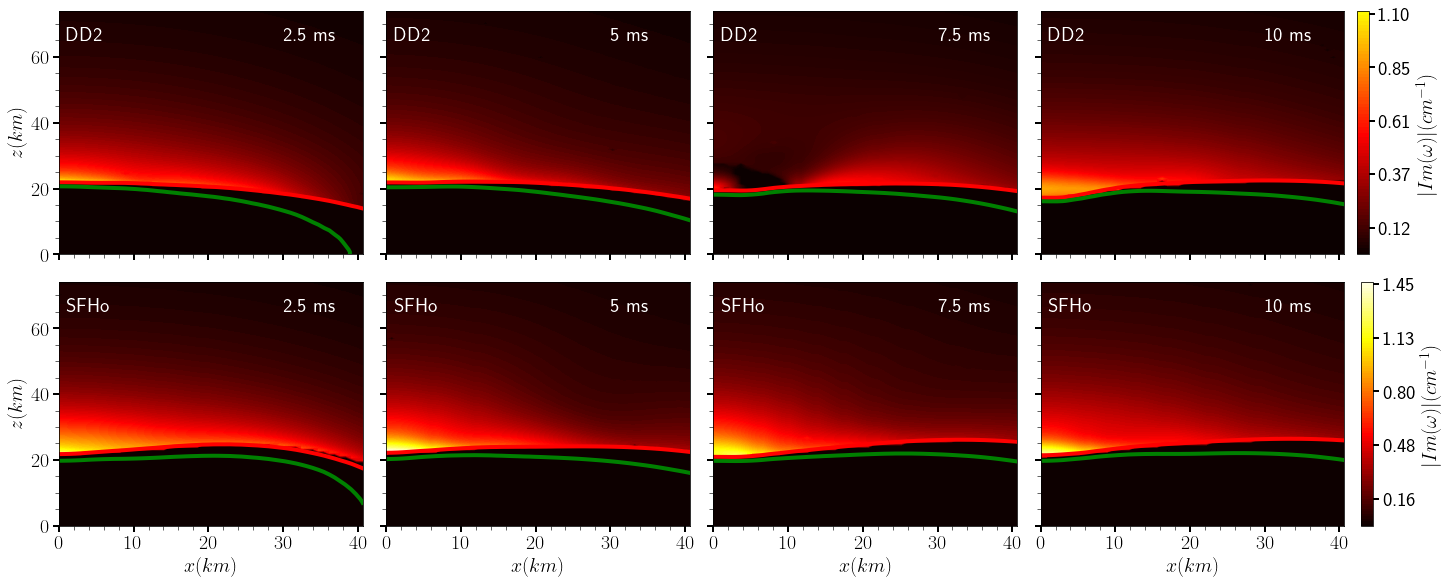

Done!.



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
plt.rc('text', usetex=True)

#plt.style.use('seaborn-white')
#plt.rcParams['savefig.facecolor'] = "0.9"

x = np.linspace(0, 55, 56)
y = np.linspace(0, 100, 101)
Y, X = np.meshgrid(y, x)


EoS = ["DD2", "SFHo"]
T = ["2p5", "5", "7p5", "10"]
t = ["2.5 ms", "5 ms", "7.5 ms", "10 ms"]
Surfnu = [[56, 56, 59, 63],[60,59,63,63]]
Surfanu = [[63, 56, 58,61],[64,58,59,59]]

ls = '-'
lw = 3

#colors = [[norm(0.),"black"],[norm(0.1), "darkblue"],[norm(0.25), "blue"],[norm(0.5), "cyan"],[norm(1.0), "yellow"]
#          ,[norm(1.25), "red"],[norm(1.5),"darkred"]]
norm = matplotlib.colors.Normalize(0.,1.5)
colorsOmu = [[norm(0.),"black"],[norm(0.3), "blue"],[norm(0.75), "cyan"],[norm(1.), "yellow"],
            [norm(1.5),"red"]]
colormapOmu = matplotlib.colors.LinearSegmentedColormap.from_list("", colorsOmu)
colormapOmu = "hot"

lsnu = '-r'
lsanu = '-g'

cmap = 'hot'
cmap = 'hot'
fntsize  =20
cbticklen = 6
lblsize  = 20
figxsize = 20
figzsize = 8
ncontour  = 100
ls = '-'
lw = 4
cbaspect = 50
levs = np.arange(0., 0.027, 0.0001)
cff = []
fig, axs  = plt.subplots(2,4, figsize=(figxsize, figzsize),constrained_layout=True)
for i in range(len(EoS)):
    for j in range(len(T)):
        Nx1 = Surfnu[i][j]
        Nx2 = Surfanu[i][j]
        Nz1 = Nx1
        Nz2 = Nx2

        outname = "InstabCmap" + EoS[i]+T[j]+".png"
        surfx1_, surfz1_, data1_ = np.loadtxt(EoS[i]+'135'+T[j]+'_enu_density_on_tau_enu_surf_q1.dat', unpack='True')
        surfx2_, surfz2_, data2_ = np.loadtxt(EoS[i]+'135'+T[j]+'_aenu_density_on_tau_aenu_surf_q1.dat', unpack='True')
        xx, zz, _Oi = np.loadtxt('_OmegaI'+EoS[i] + T[j]+'.dat', unpack='True')
        np.array(_Oi)

        Oi_ = _Oi[:56*101]
        Oi = Oi_.reshape(56, 101)
        print(Oi.max())
        surfx1 = surfx1_[0:Nx1]
        surfz1 = surfz1_[0:Nz1]

        surfx2 = surfx2_[0:Nx2]
        surfz2 = surfz2_[0:Nz2]

        #fig = plt.figure(figsize=(5, 5),constrained_layout=True)
        ax = axs[i][j]
        cf=ax.contourf(X*0.739, (100-Y)*0.739, Oi, ncontour, cmap=colormapOmu, vmin=0.00, vmax=1.5)
        cff.append(cf)
        ax.plot((surfx1-145)*0.739, (surfz1-145)* 0.739, lsnu, linewidth = lw, label='$\\nu_e$')
        ax.plot((surfx2-145)*0.739, (surfz2-145) *0.739, lsanu, linewidth = lw, label='$\\bar\\nu_e$')
        #ax.set_xlabel('$x (km)$', fontsize=fntsize)
        if i ==1 :
            ax.set_xlabel('$x (km)$', fontsize=fntsize)
        else:
            ax.set_xticklabels("")
        #if i == 0 :
        #ax.set_title(t[j], loc = 'right', fontsize = fntsize)
        ax.text(1.0, 65.0,EoS[i], fontsize=fntsize, color = "white")
        ax.text(30.0, 65.0,t[j], fontsize=fntsize, color = "white")
        #ax.set_title(EoS[i], loc = 'left', fontsize = fntsize)
        ax.tick_params(labelsize = lblsize, direction='out', length=cbticklen, width=lw/2)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(which='minor', length=4, direction = 'out')
        #ax.legend(loc = 0, frameon='True')
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

        if (j==0):
            ax.set_ylabel('$z (km)$', fontsize=fntsize)
        else:
            ax.set_yticklabels("")
        if (j==3):
            v1 = np.linspace(0.0, 1.09819, 10, endpoint=True)
            #cb = fig.add_axes()
            if(i==0):
                cbar = fig.colorbar(cff[0],ax= ax,
                        ticks = v1[::-2], 
                        aspect =50,         
                        #shrink=1.0,
                        format = "%.2f"
                               )
            if (i==1):
                v1 = np.linspace(0.0, 1.447, 10, endpoint=True)
                cbar = fig.colorbar(cff[5],ax= ax, 
                        ticks = v1[::-2], 
                        aspect =50,         
                        #shrink=1.0,
                        format = "%.2f"
                               )
            cbar.ax.tick_params(tickdir='out',size= cbticklen, width =2, labelsize=lblsize)
            cbar.ax.set_ylabel('$|Im(\\omega)| (cm^{-1})$', 
                   fontsize =fntsize)
plt.savefig('CmapOi'+ '.png', dpi=300, axis='tight')
plt.show()
print("Done!.\n")